
**Supervised Machine Learning TELCO Customer Unsubscribing**

The objective of this exercise is to estimate the probability of a customer abandoning the telephone company's service, based on a churn prediction model.
on the basis of a churn prediction model.

The company's objective is to base its entire customer retention strategy on those customers that are most likely to
churn in the next month (month+1). To develop the model, we have drawn from the database a sample that includescustomers who have churned and customers who have not churned in a specific month (month 0). We have their attributes
as a customer in the previous month (month-1): type of customer, socio-demographic characteristics, use of the service, products contracted, etc.
products contracted, etc.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab



import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from pickle import dump    # guardar archivos comprimidos

In [ ]:
df_predict = pd.read_csv('/content/drive/MyDrive/Master Data Science Nuclio/Machine Learning/Entregable/telecom_churn_PREDICT.csv')

In [ ]:
df_traintest = pd.read_csv('/content/drive/MyDrive/Master Data Science Nuclio/Machine Learning/Entregable/telecom_churn_TRAINTEST.csv')

In [ ]:
df_predict.head()

rev      mou    totmrc      da  ovrmou  ovrrev  vceovr  datovr  \
0   30.8350   136.75   29.9900  0.2475    1.25   0.500     0.5   0.000   
1   35.8475   352.75   24.2700  0.4950   23.25   9.285     8.7   0.585   
2   30.3275   241.50   39.9900  0.0000    0.00   0.000     0.0   0.000   
3  154.6925  2297.00  149.9900  4.7025    0.00   0.000     0.0   0.000   
4  156.0050   542.25   48.9475  0.7425   70.75  28.295    28.1   0.195   

     roam  change_mou  ...  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  \
0  0.0975       48.25  ...       1.0       U       U       U        U   
1  1.8000     -352.75  ...       0.0       N       U       U        U   
2  0.0000      -86.50  ...       0.0       N       U       U        U   
3  0.0000      119.00  ...       0.0       S       U       U        U   
4  0.0000      195.75  ...       0.0       N       U       U        U   

   kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0         U         U         Y    216.0      1090001  
1         U         U         N    101.0      1090002  
2         U         U         Y    262.0      1090003  
3         U         U         Y    127.0      1090004  
4         U         U         Y     37.0      1090005  

[5 rows x 99 columns]

In [ ]:
df_traintest.head()

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  roam  \
0  23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   0.0   
1  57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   0.0   
2  16.9900   10.25  16.990  0.0000    0.00     0.0     0.0     0.0   0.0   
3  38.0000    7.50  38.000  0.0000    0.00     0.0     0.0     0.0   0.0   
4  55.2300  570.50  71.980  0.0000    0.00     0.0     0.0     0.0   0.0   

   change_mou  ...  forgntvl  ethnic  kid0_2  kid3_5  kid6_10  kid11_15  \
0     -157.25  ...       0.0       N       U       U        U         U   
1      532.25  ...       0.0       Z       U       U        U         U   
2       -4.25  ...       0.0       N       U       Y        U         U   
3       -1.50  ...       0.0       U       Y       U        U         U   
4       38.50  ...       0.0       I       U       U        U         U   

   kid16_17  creditcd  eqpdays  Customer_ID  
0         U         Y    361.0      1000001  
1         U         Y    240.0      1000002  
2         U         Y   1504.0      1000003  
3         U         Y   1812.0      1000004  
4         U         Y    434.0      1000005  

[5 rows x 100 columns]

In [ ]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null  float64

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_diccionary = pd.read_csv('/content/drive/MyDrive/variable_dictionary.csv')

In [ ]:
df_diccionary.head()

In [ ]:
print(df_diccionary)


In [ ]:
pd.set_option('display.max_rows', None)
print(df_diccionary)

<Axes: >

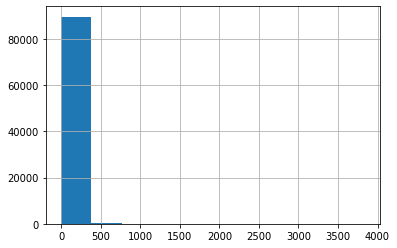

In [ ]:
df_traintest['rev'].hist()

In [ ]:
df_traintest['rev'] = df_traintest['rev'].fillna(df_traintest['rev'].mean())

<Axes: >

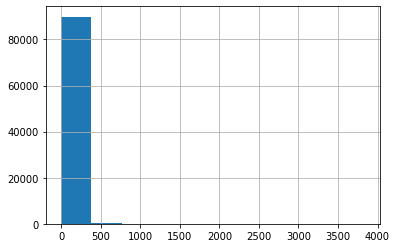

In [ ]:
df_traintest['rev'].hist()

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

<Axes: >

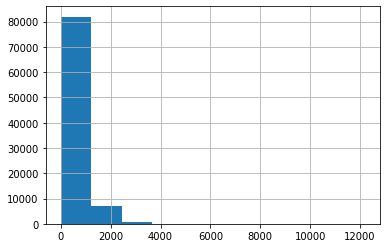

In [ ]:
df_traintest['mou'].hist()

In [ ]:
df_traintest['mou'] = df_traintest['mou'].fillna(df_traintest['mou'].mean())

<Axes: >

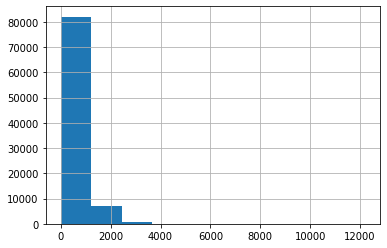

In [ ]:
df_traintest['mou'].hist()

<Axes: >

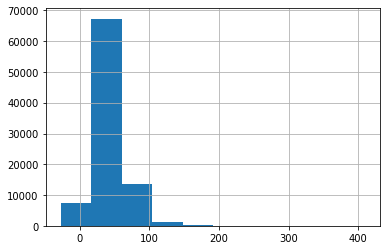

In [ ]:
df_traintest['totmrc'].hist()

In [ ]:
df_traintest['totmrc'] = df_traintest['totmrc'].fillna(df_traintest['totmrc'].mean())

<Axes: >

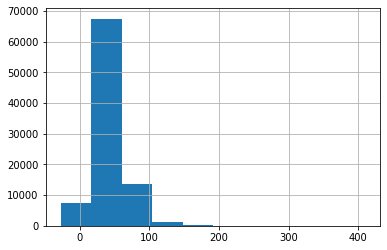

In [ ]:
df_traintest['totmrc'].hist()

<Axes: >

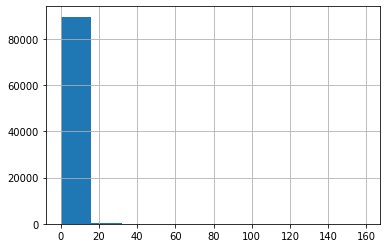

In [ ]:
df_traintest['da'].hist()

In [ ]:
df_traintest['da'] = df_traintest['da'].fillna(df_traintest['da'].mean())

<Axes: >

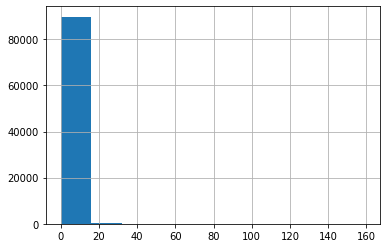

In [ ]:
df_traintest['da'].hist()

<Axes: >

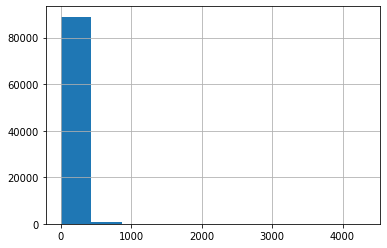

In [ ]:
df_traintest['ovrmou'].hist()

In [ ]:
df_traintest['ovrmou'] = df_traintest['ovrmou'].fillna(df_traintest['ovrmou'].mean())

In [ ]:
df_traintest['ovrrev'] = df_traintest['ovrrev'].fillna(df_traintest['ovrrev'].mean())

<Axes: >

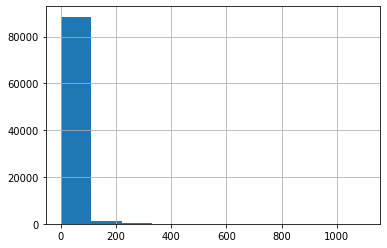

In [ ]:
df_traintest['ovrrev'].hist()

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

<Axes: >

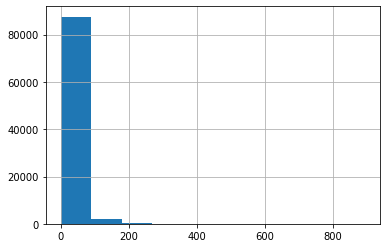

In [ ]:
df_traintest['vceovr'].hist()

In [ ]:
df_traintest['vceovr'] = df_traintest['vceovr'].fillna(df_traintest['vceovr'].mean())

<Axes: >

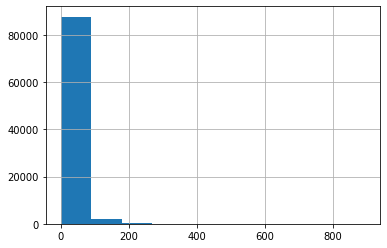

In [ ]:
df_traintest['vceovr'].hist()

<Axes: >

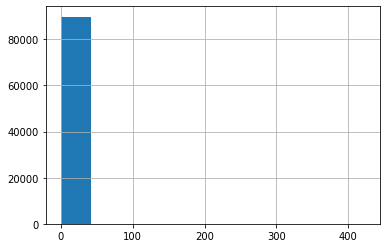

In [ ]:
df_traintest['datovr'].hist()

In [ ]:
df_traintest['datovr'] = df_traintest['datovr'].fillna(df_traintest['datovr'].mean())

<Axes: >

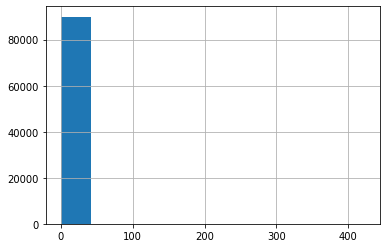

In [ ]:
df_traintest['datovr'].hist()

<Axes: >

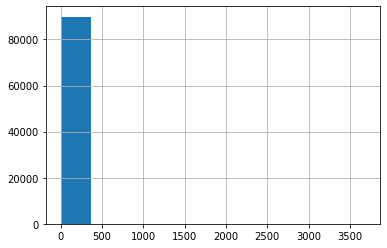

In [ ]:
df_traintest['roam'].hist()

In [ ]:
df_traintest['roam'] = df_traintest['roam'].fillna(df_traintest['roam'].mean())

<Axes: >

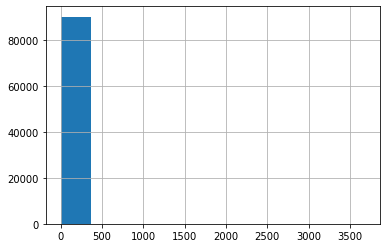

In [ ]:
df_traintest['roam'].hist()

<Axes: >

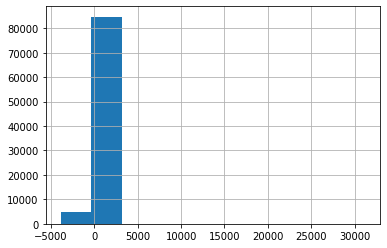

In [ ]:
df_traintest['change_mou'].hist()

In [ ]:
df_traintest['change_mou'] = df_traintest['change_mou'].fillna(df_traintest['change_mou'].mean())

<Axes: >

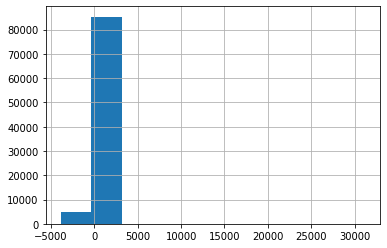

In [ ]:
df_traintest['change_mou'].hist()

<Axes: >

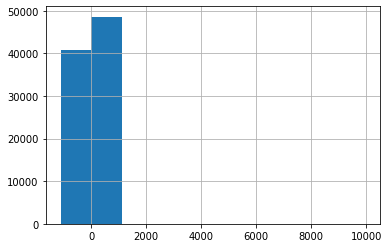

In [ ]:
df_traintest['change_rev'].hist()

In [ ]:
df_traintest['change_rev'] = df_traintest['change_rev'].fillna(df_traintest['change_rev'].mean())

<Axes: >

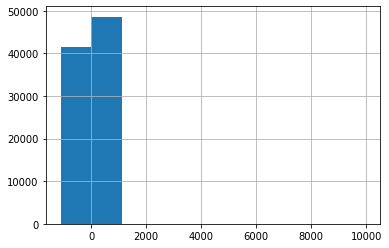

In [ ]:
df_traintest['change_rev'].hist()

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

<Axes: >

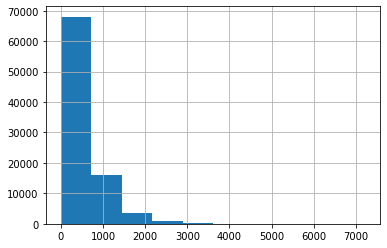

In [ ]:
df_traintest['avg6mou'].hist()

In [ ]:
df_traintest['avg6mou'] = df_traintest['avg6mou'].fillna(df_traintest['avg6mou'].mean())

<Axes: >

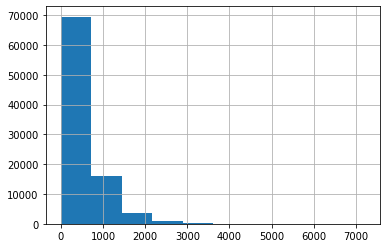

In [ ]:
df_traintest['avg6mou'].hist()

<Axes: >

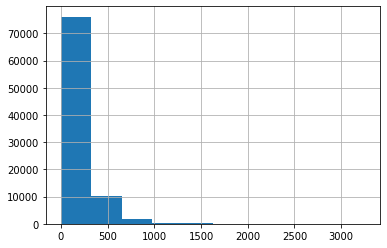

In [ ]:
df_traintest['avg6qty'].hist()

In [ ]:
df_traintest['avg6qty'] = df_traintest['avg6qty'].fillna(df_traintest['avg6qty'].mean())

<Axes: >

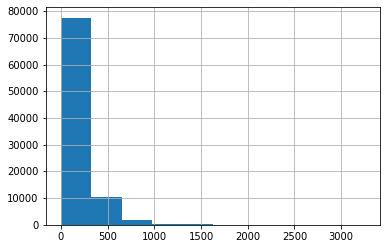

In [ ]:
df_traintest['avg6qty'].hist()

<Axes: >

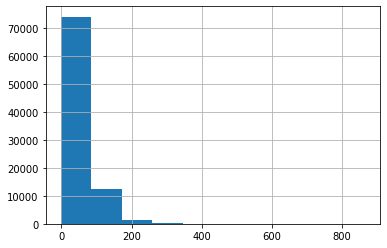

In [ ]:
df_traintest['avg6rev'].hist()

In [ ]:
df_traintest['avg6rev'] = df_traintest['avg6rev'].fillna(df_traintest['avg6rev'].mean())

<Axes: >

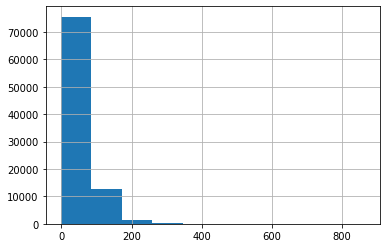

In [ ]:
df_traintest['avg6rev'].hist()

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_traintest['prizm_social_one'].value_counts()

S    29203
U    20935
C    15244
T    13705
R     4376
Name: prizm_social_one, dtype: int64

In [ ]:
df_traintest['prizm_social_one'].fillna(df_traintest['prizm_social_one'].mode()[0], inplace=True)

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_traintest['prizm_social_one'].fillna(df_traintest['prizm_social_one'].mode()[0], inplace=True)

In [ ]:
df_traintest.info()

In [ ]:
df_traintest['prizm_social_one'].fillna(df_traintest['prizm_social_one'].mode()[0], inplace=True)

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_traintest['area'].fillna(df_traintest['area'].mode()[0], inplace=True)

In [ ]:
df_traintest['dualband'].fillna(df_traintest['dualband'].mode()[0], inplace=True)

In [ ]:
df_traintest['refurb_new'].fillna(df_traintest['refurb_new'].mode()[0], inplace=True)

In [ ]:
df_traintest['hnd_price'].fillna(df_traintest['hnd_price'].mode()[0], inplace=True)

In [ ]:
df_traintest['phones'].fillna(df_traintest['phones'].mode()[0], inplace=True)

In [ ]:
df_traintest['models'].fillna(df_traintest['models'].mode()[0], inplace=True)

In [ ]:
df_traintest['hnd_webcap'].fillna(df_traintest['hnd_webcap'].mode()[0], inplace=True)

In [ ]:
df_traintest['ownrent'].fillna(df_traintest['ownrent'].mode()[0], inplace=True)

In [ ]:
df_traintest['dwlltype'].value_counts()

S    44521
M    17501
Name: dwlltype, dtype: int64

In [ ]:
df_traintest['dwlltype'].fillna(df_traintest['dwlltype'].mode()[0], inplace=True)

In [ ]:
df_traintest['dwlltype'].value_counts()

S    72499
M    17501
Name: dwlltype, dtype: int64

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [ ]:
df_traintest['kid0_2'].fillna(df_traintest['kid0_2'].mode()[0], inplace=True)

In [ ]:
df_traintest['marital'].fillna(df_traintest['marital'].mode()[0], inplace=True)

In [ ]:
df_traintest['infobase'].fillna(df_traintest['infobase'].mode()[0], inplace=True)

In [ ]:
df_traintest['HHstatin'].fillna(df_traintest['HHstatin'].mode()[0], inplace=True)

In [ ]:
df_traintest['dwllsize'].fillna(df_traintest['dwllsize'].mode()[0], inplace=True)

In [ ]:
df_traintest['dwlltype'].fillna(df_traintest['dwlltype'].mode()[0], inplace=True)

In [ ]:
df_traintest['ethnic'].fillna(df_traintest['ethnic'].mode()[0], inplace=True)

In [ ]:
df_traintest['kid3_5'].fillna(df_traintest['kid3_5'].mode()[0], inplace=True)

In [ ]:
df_traintest['kid6_10'].fillna(df_traintest['kid6_10'].mode()[0], inplace=True)

In [ ]:
df_traintest['kid11_15'].fillna(df_traintest['kid11_15'].mode()[0], inplace=True)

In [ ]:
df_traintest['kid16_17'].fillna(df_traintest['kid16_17'].mode()[0], inplace=True)

In [ ]:
df_traintest['creditcd'].fillna(df_traintest['creditcd'].mode()[0], inplace=True)

In [ ]:
df_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               90000 non-null  float64
 1   mou               90000 non-null  float64
 2   totmrc            90000 non-null  float64
 3   da                90000 non-null  float64
 4   ovrmou            90000 non-null  float64
 5   ovrrev            90000 non-null  float64
 6   vceovr            90000 non-null  float64
 7   datovr            90000 non-null  float64
 8   roam              90000 non-null  float64
 9   change_mou        90000 non-null  float64
 10  change_rev        90000 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

<Axes: >

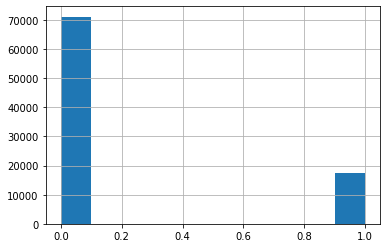

In [ ]:
df_traintest['truck'].hist()

In [ ]:
df_traintest['truck'] = df_traintest['truck'].fillna(df_traintest['truck'].mean())

<Axes: >

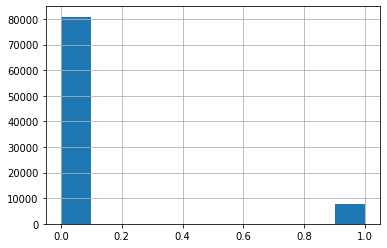

In [ ]:
df_traintest['rv'].hist()

In [ ]:
df_traintest['rv'] = df_traintest['rv'].fillna(df_traintest['rv'].mean())

<Axes: >

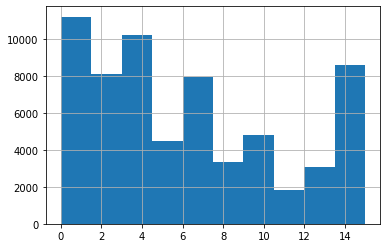

In [ ]:
df_traintest['lor'].hist()

In [ ]:
df_traintest['lor'] = df_traintest['lor'].fillna(df_traintest['lor'].median())


<Axes: >

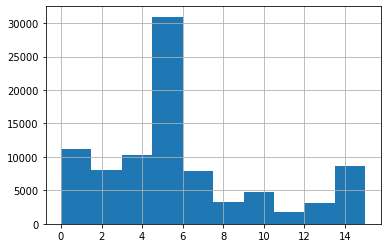

In [ ]:
df_traintest['lor'].hist()

<Axes: >

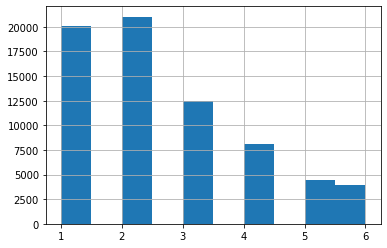

In [ ]:
df_traintest['adults'].hist()

In [ ]:
df_traintest['adults'] = df_traintest['adults'].fillna(df_traintest['adults'].mean())

<Axes: >

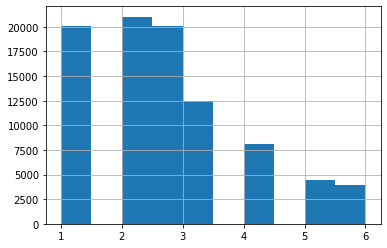

In [ ]:
df_traintest['adults'].hist()

<Axes: >

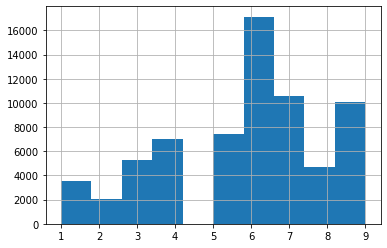

In [ ]:
df_traintest['income'].hist()

In [ ]:
df_traintest['income'] = df_traintest['income'].fillna(df_traintest['income'].median())

<Axes: >

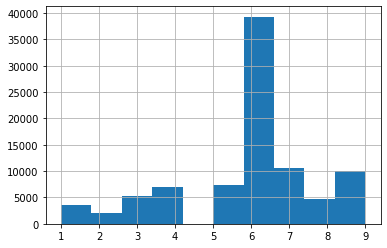

In [ ]:
df_traintest['income'].hist()

<Axes: >

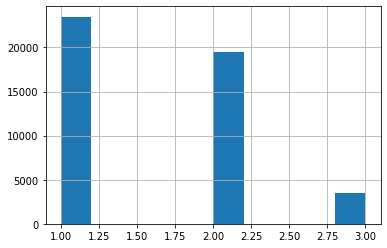

In [ ]:
df_traintest['numbcars'].hist()

In [ ]:
df_traintest['numbcars'] = df_traintest['numbcars'].fillna(df_traintest['numbcars'].median())

<Axes: >

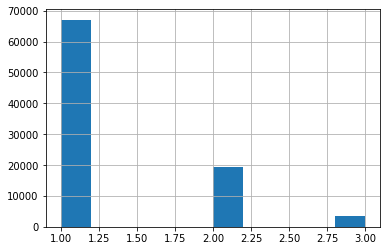

In [ ]:
df_traintest['numbcars'].hist()

<Axes: >

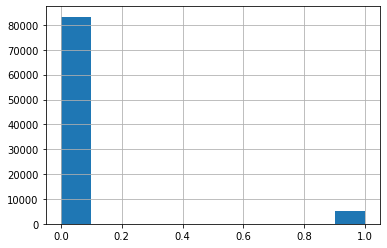

In [ ]:
df_traintest['forgntvl'].hist()

In [ ]:
df_traintest['forgntvl'] = df_traintest['forgntvl'].fillna(df_traintest['forgntvl'].mean())

<Axes: >

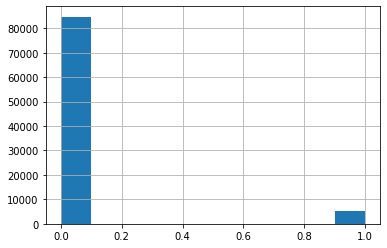

In [ ]:
df_traintest['forgntvl'].hist()

<Axes: >

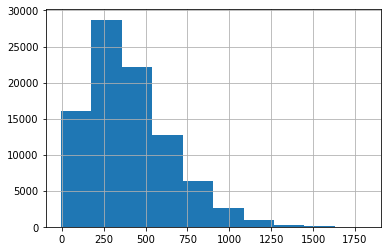

In [ ]:
df_traintest['eqpdays'].hist()

In [ ]:
df_traintest['eqpdays'] = df_traintest['eqpdays'].fillna(df_traintest['eqpdays'].mean())

<Axes: >

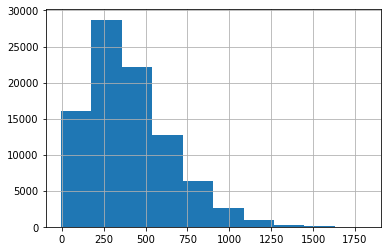

In [ ]:
df_traintest['eqpdays'].hist()

In [ ]:
df_traintest.info()

In [ ]:
#hacer bucle for para separar las variables categoricas , num y bool

In [ ]:
target = ["churn"]
def obtener_lista_variable(df_traintest):
  l_num=[]
  l_bool=[]
  l_cat=[]
  for i in df_traintest:
    if((df_traintest[i].dtype.kind == 'f') | (df_traintest[i].dtype.kind == 'i')) & (i not in target)& (len(df_traintest[i].unique()) != 2):
      l_num.append(i)
    elif ((df_traintest[i].dtype.kind == 'b') | (df_traintest[i].dtype.kind == 'i')) & (len(df_traintest[i].unique()) == 2) & (i not in target):
      l_bool.append(i)
    elif(df_traintest[i].dtype.kind =='O') & (i not in target):
      l_cat.append(i)
  return l_num, l_cat, l_bool

In [ ]:
l_num, l_cat, l_bool = obtener_lista_variable(df_traintest)

In [ ]:
len(l_num)

78

In [ ]:
len(l_cat)

21

In [ ]:
df_traintest.shape

(90000, 100)

In [ ]:
df_traintest= pd.get_dummies(data=df_traintest,columns=l_cat)

In [ ]:
df_traintest.shape

(90000, 230)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
MinMaxScaler = MinMaxScaler()

In [ ]:
columnas= l_num

In [ ]:
df_traintest[columnas] = MinMaxScaler.fit_transform(df_traintest[columnas].values)

In [ ]:
df_traintest.head()

In [ ]:
#Target distribution

In [ ]:
target = 'churn'
features = df_traintest.columns[df_traintest.columns != target]

In [ ]:
y = df_traintest[target]
X = df_traintest[features]

In [ ]:
#High-Correlation

In [ ]:
corr=df_traintest2.corr()
corr.style.background_gradient(cmap="coolwarm")

In [ ]:
def highly_correlated(df_traintestf1, y, threshold = 0.95):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = df_traintestf1.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(df_traintestf1[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(df_traintestf1[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(df_traintest,y,0.95)
highly_corr

F1             F2  corr_F1_F2  corr_F1_target  \
0            ovrrev         ovrmou    0.957401        0.021369   
1            vceovr         ovrmou    0.954806        0.021572   
2            vceovr         ovrrev    0.994997        0.021572   
3          comp_vce       plcd_vce    0.985686        0.050651   
4          comp_dat       plcd_dat    0.990591        0.007206   
5            cc_mou       ccrndmou    0.988749        0.032771   
6          inonemin       recv_vce    0.965997        0.033247   
7          mou_opkd       mou_cdat    0.960178        0.008218   
8           attempt       plcd_vce    0.998551        0.047133   
9           attempt       comp_vce    0.984313        0.047133   
10         complete       plcd_vce    0.983671        0.050721   
11         complete       comp_vce    0.997889        0.050721   
12         complete        attempt    0.985763        0.050721   
13           adjrev         totrev    0.998538        0.020232   
14           adjmou         totmou    0.999780        0.028345   
15           adjqty       totcalls    0.999825        0.026333   
16          avg3mou            mou    0.981129        0.049857   
17          avg6mou        avg3mou    0.954794        0.042115   
18          avg6qty        avg3qty    0.961125        0.037375   
19       asl_flag_Y     asl_flag_N    1.000000        0.050454   
20     refurb_new_R   refurb_new_N    1.000000        0.029593   
21  hnd_webcap_UNKW     dualband_U    0.972332        0.013524   
22  hnd_webcap_WCMB  hnd_webcap_WC    0.990951        0.044149   
23        ownrent_R      ownrent_O    1.000000        0.005775   
24       dwlltype_S     dwlltype_M    1.000000        0.005219   
25         kid0_2_Y       kid0_2_U    1.000000        0.009219   
26         kid3_5_Y       kid3_5_U    1.000000        0.005748   
27        kid6_10_Y      kid6_10_U    1.000000        0.003072   
28       kid11_15_Y     kid11_15_U    1.000000        0.003393   
29       kid16_17_Y     kid16_17_U    1.000000        0.004405   
30       creditcd_Y     creditcd_N    1.000000        0.025507   

    corr_F2_target      F_to_delete  
0         0.016317           ovrmou  
1         0.016317           ovrmou  
2         0.021369           ovrrev  
3         0.047029         plcd_vce  
4         0.007389         comp_dat  
5         0.034388           cc_mou  
6         0.040898         inonemin  
7         0.008764         mou_opkd  
8         0.047029         plcd_vce  
9         0.050651          attempt  
10        0.047029         plcd_vce  
11        0.050651         comp_vce  
12        0.047133          attempt  
13        0.019794           totrev  
14        0.027808           totmou  
15        0.025889         totcalls  
16        0.057932          avg3mou  
17        0.049857          avg6mou  
18        0.044080          avg6qty  
19        0.050454       asl_flag_N  
20        0.029593     refurb_new_N  
21        0.014585  hnd_webcap_UNKW  
22        0.046263  hnd_webcap_WCMB  
23        0.005775        ownrent_O  
24        0.005219       dwlltype_S  
25        0.009219         kid0_2_U  
26        0.005748         kid3_5_U  
27        0.003072        kid6_10_U  
28        0.003393       kid11_15_U  
29        0.004405       kid16_17_U  
30        0.025507       creditcd_N

In [ ]:
df_traintest2 = df_traintest.copy()

In [ ]:
df_traintest2 = df_traintest2.drop(['ovrmou','ovrrev','ovrrev','plcd_vce','comp_dat','cc_mou','inonemin','mou_opkd','plcd_vce','attempt','plcd_vce','attempt','totrev','totmou','totcalls'], axis=1)

In [ ]:
df_traintest2 = df_traintest2.drop(['avg3mou','avg6mou','avg6qty','asl_flag_N','refurb_new_N','hnd_webcap_UNKW','hnd_webcap_WCMB','ownrent_O','dwlltype_S','kid0_2_U','kid3_5_U','kid6_10_U','kid11_15_U','kid16_17_U','creditcd_N'], axis=1)

In [ ]:
df_traintest2 = df_traintest2.drop(['comp_vce'], axis=1)

In [ ]:
df_traintest2= df_traintest2.drop(['infobase_M'], axis=1) #elimino por baja varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(X)
cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)
print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

130  low variance features were removed:
 ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'phones', 'models', 'crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod

In [ ]:
df_traintest2.shape


(90000, 202)

In [ ]:
df_traintest.to_csv('/content/drive/MyDrive/Master Data Science Nuclio/Entrega_2/CleanDatasetNew2.csv')

In [ ]:
df_traintest.to_csv('/content/drive/MyDrive/Master Data Science Nuclio/Entrega_2/CleanDatasetNew2.csv')